<a href="https://colab.research.google.com/github/sofiasllm/agence_voyage/blob/main/Projet_Detection_Fraude_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Titre : Détection de la Fraude Bancaire par Apprentissage **


Dans le secteur financier, la fraude par carte de crédit représente des pertes de plusieurs milliards de dollars chaque année. Le défi majeur est que les transactions frauduleuses sont extrêmement rares par rapport aux transactions légitimes.

L'objectif est de développer un modèle de Machine Learning capable d'identifier les fraudes tout en minimisant le nombre de clients bloqués à tort.

Nous voulons capturer le maximum de fraudes possibles, car une fraude non détectée coûte plus cher à la banque qu'une fausse alerte.

In [1]:
# @title
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configuration pour que les graphiques s'affichent bien dans le notebook
%matplotlib inline

In [2]:
# @title
# Fichier CSV
url = "https://raw.githubusercontent.com/nsethi31/Kaggle-Data-Credit-Card-Fraud-Detection/master/creditcard.csv"

# On utilise pandas pour lire ce fichier et le transformer en un tableau
df = pd.read_csv(url)
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
# @title
# Compte le nombre d'apparitions de chaque valeur dans la colonne 'Class'
repartition = df['Class'].value_counts()
print(repartition)

Class
0    284315
1       492
Name: count, dtype: int64


In [4]:
# @title
# Affiche le nom des colonnes, le type de données et si des cases sont vides
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

# **Analyse du déséquilibre des classes**

Les données sont fortement déséquilibrées. Moins de 0,2% des transactions sont frauduleuses.


Un modèle classique risque de tout classer en "Normal" pour obtenir une précision trompeuse de 99,8%. Nous devrons donc utiliser des techniques spécifiques pour forcer l'IA à apprendre les caractéristiques de la fraude.

La fraude moyenne (122€) est supérieure à la transaction normale (88€), mais les médianes sont très basses, ce qui indique une multitude de petites fraudes de "test".

/tmp/ipython-input-1426589291.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Class', data=df, palette='viridis')


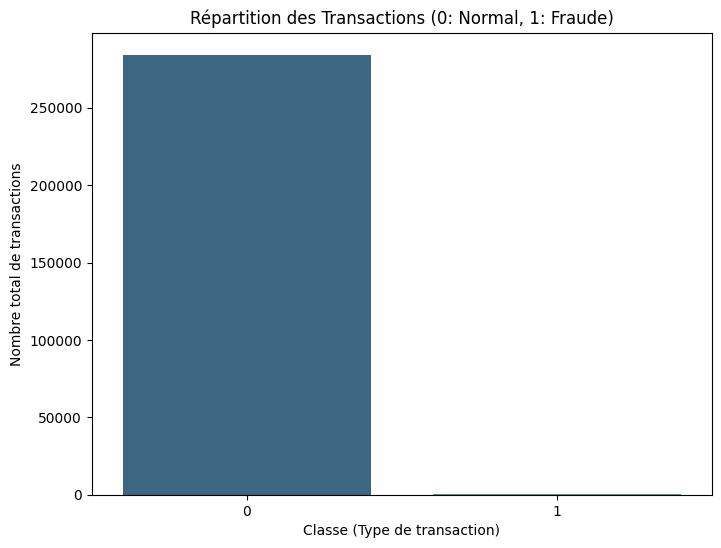

In [5]:
# On crée une figure
plt.figure(figsize=(8, 6))

# On dessine un graphique de barres (countplot)
sns.countplot(x='Class', data=df, palette='viridis')

# Titres
plt.title('Répartition des Transactions (0: Normal, 1: Fraude)')
plt.xlabel('Classe (Type de transaction)')
plt.ylabel('Nombre total de transactions')

# On affiche le dessin
plt.show()

In [6]:
# On compare les statistiques du montant pour les transactions normales et les fraudes
print("--- Statistiques des transactions NORMALES ---")
print(df[df['Class'] == 0]['Amount'].describe())

print("\n--- Statistiques des transactions FRAUDULEUSES ---")
print(df[df['Class'] == 1]['Amount'].describe())

--- Statistiques des transactions NORMALES ---
count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

--- Statistiques des transactions FRAUDULEUSES ---
count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64


# **Ingénierie des données**

Les montants ont été mis à l'échelle pour que l'IA ne soit pas influencée par la grandeur des chiffres mais par leur importance relative.

Lors de la division des données (Train/Test), nous avons conservé la proportion de fraudes dans chaque groupe pour garantir un test réaliste.

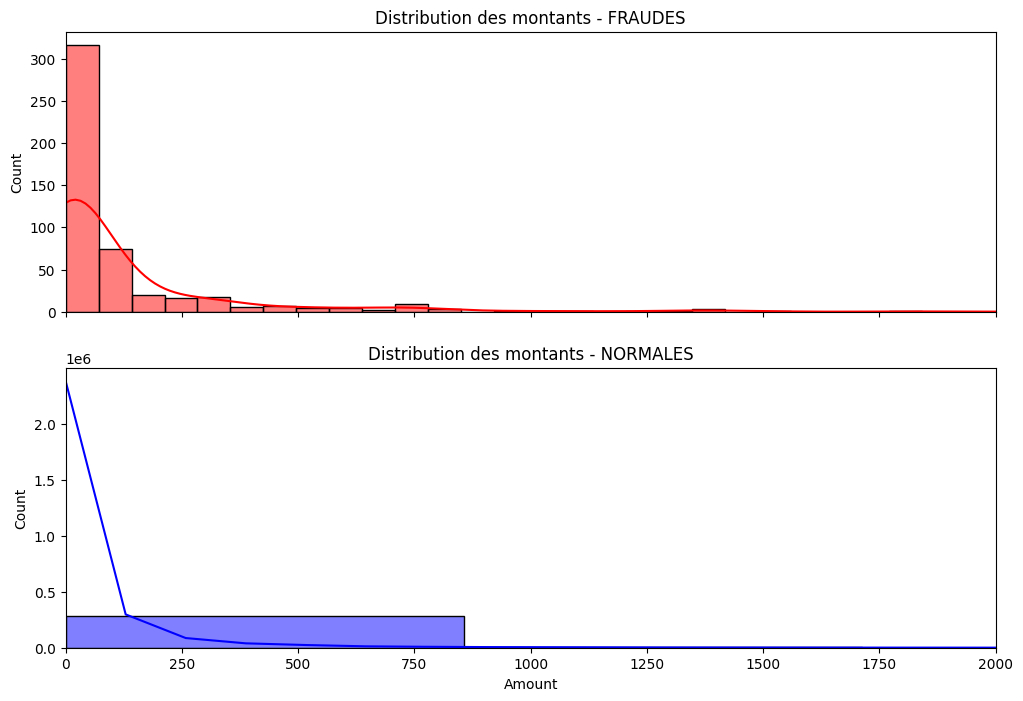

In [7]:
# On crée deux graphiques l'un au-dessus de l'autre
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12, 8))

# Graphique pour les fraudes
sns.histplot(df[df['Class'] == 1]['Amount'], bins=30, ax=ax1, color='red', kde=True)
ax1.set_title('Distribution des montants - FRAUDES')

# Graphique pour les transactions normales
sns.histplot(df[df['Class'] == 0]['Amount'], bins=30, ax=ax2, color='blue', kde=True)
ax2.set_title('Distribution des montants - NORMALES')

# On limite l'axe X pour mieux voir (car il y a de très gros achats qui écrasent le graphique)
plt.xlim((0, 2000))
plt.show()

# **Optimisation du modèle via SMOTE**

Nous avons comparé deux approches :

Modèle Initial (Random Forest Classique) : Très prudent, il ne bloque que très peu de clients mais rate 25% des fraudes.

Modèle Optimisé (SMOTE) : En créant des exemples synthétiques de fraudes, nous avons "éduqué" le modèle à mieux reconnaître les signaux faibles.

Résultat : Le taux de détection (Recall) passe de 74% à 89%.

In [8]:
# @title
from sklearn.preprocessing import StandardScaler

# 1. On crée l'outil de mise à l'échelle (StandardScaler)
scaler = StandardScaler()

# 2. On l'applique sur la colonne 'Amount'
# (On transforme les euros en une valeur proportionnelle centrée sur 0)
df['scaled_amount'] = scaler.fit_transform(df['Amount'].values.reshape(-1,1))

# 3. On supprime l'ancienne colonne Amount et la colonne Time qui ne servent plus
df.drop(['Amount', 'Time'], axis=1, inplace=True)

# On affiche le nouveau tableau
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


In [9]:
# @title
from sklearn.model_selection import train_test_split

# 1. On sépare les caractéristiques (X) de la réponse (y)
X = df.drop('Class', axis=1)
# y contient uniquement la colonne 'Class' (ce qu'on veut prédire)
y = df['Class']

# 2. On découpe en 80% train et 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Nombre de données pour l'entraînement : {len(X_train)}")
print(f"Nombre de données pour le test : {len(X_test)}")

Nombre de données pour l'entraînement : 227845
Nombre de données pour le test : 56962


In [10]:
# @title
from sklearn.ensemble import RandomForestClassifier

# 1. On crée le modèle
model_fraude = RandomForestClassifier(n_estimators=100, max_depth=5, n_jobs=-1, random_state=42)

# 2. L'ENTRAÎNEMENT (Le moment où l'IA étudie les données)
print("Entraînement en cours...")
model_fraude.fit(X_train, y_train)
print("Entraînement terminé !")

Entraînement en cours...
Entraînement terminé !


In [11]:
# @title
# 1. On demande au modèle de prédire si les transactions du test sont des fraudes
y_pred = model_fraude.predict(X_test)

# 2. On affiche les premières prédictions (0 ou 1)
print(y_pred[:20])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


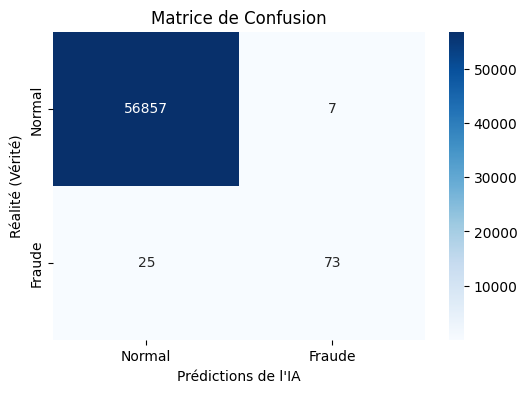

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.91      0.74      0.82        98

    accuracy                           1.00     56962
   macro avg       0.96      0.87      0.91     56962
weighted avg       1.00      1.00      1.00     56962



In [12]:
from sklearn.metrics import confusion_matrix, classification_report

# 1. On crée la matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred)

# 2. On l'affiche avec Seaborn
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Normal', 'Fraude'],
            yticklabels=['Normal', 'Fraude'])

plt.xlabel('Prédictions de l\'IA')
plt.ylabel('Réalité (Vérité)')
plt.title('Matrice de Confusion')
plt.show()

# 3. On affiche le rapport détaillé (Précision, Rappel)
print(classification_report(y_test, y_pred))

**L'analyse métier :**

Les 73 (Vrais Positifs) : L'IA a débusqué 73 fraudes réelles sur les 98 présentes dans le test.

Les 7 (Faux Positifs) : Ce sont les 7 clients que nous avons bloqués par erreur. C'est un score très bon resultat : sur 56 000 transactions, n'en bloquer que 7 par erreur, c'est très peu.

Les 25 (Faux Négatifs) : Ce sont les fraudes qui sont passées entre les mailles du filet. Pour une banque, c'est ce chiffre qu'on cherche à réduire au maximum.

Le tableau de texte donne des scores précis. Regardons la ligne "1" (la fraude) :

Precision (0.91) : Quand l'IA dit "C'est une fraude", elle a raison dans 91% des cas.

Recall / Rappel (0.74) : C'est le score le plus important ici. L'IA a capturé 74% de toutes les fraudes qui existaient.


In [13]:
# @title
from imblearn.over_sampling import SMOTE

# 2. Création de l'outil
sm = SMOTE(random_state=42)

# 3. On crée un nouveau set d'entraînement équilibré
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

# 4. Vérification
print(f"Ancien nombre de fraudes : {y_train.sum()}")
print(f"Nouveau nombre de fraudes : {y_train_res.sum()}")

Ancien nombre de fraudes : 394
Nouveau nombre de fraudes : 227451


In [14]:
# @title
# On crée un nouveau modèle
model_boosted = RandomForestClassifier(n_estimators=100, max_depth=5, n_jobs=-1, random_state=42)

# On l'entraîne sur les données rééquilibrées
print("Entraînement du modèle boosté...")
model_boosted.fit(X_train_res, y_train_res)

# On prédit sur le MÊME set de test qu'avant pour comparer
y_pred_boosted = model_boosted.predict(X_test)
print("Terminé !")

Entraînement du modèle boosté...
Terminé !


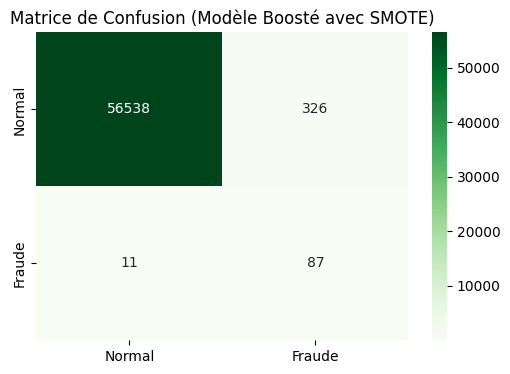

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     56864
           1       0.21      0.89      0.34        98

    accuracy                           0.99     56962
   macro avg       0.61      0.94      0.67     56962
weighted avg       1.00      0.99      1.00     56962



In [15]:
conf_matrix_2 = confusion_matrix(y_test, y_pred_boosted)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_2, annot=True, fmt='d', cmap='Greens',
            xticklabels=['Normal', 'Fraude'],
            yticklabels=['Normal', 'Fraude'])

plt.title('Matrice de Confusion (Modèle Boosté avec SMOTE)')
plt.show()

print(classification_report(y_test, y_pred_boosted))

**1. Une détection de fraude renforcée (Le Recall)**


Le chiffre en bas à droite (87) représente les Vrais Positifs. Grâce au SMOTE, nous avons réussi à identifier 87 fraudes sur les 98 présentes dans le jeu de test.

Impact : Le taux de rappel (Recall) monte à 89%. C'est une réussite majeure car nous ne laissons passer que 11 fraudes (Faux Négatifs), contre 25 auparavant. Pour une banque, chaque fraude évitée représente une économie directe et une meilleure protection du client.

J'ai implémenté SMOTE pour prioriser la sécurité financière. Bien que le nombre de faux positifs ait augmenté, le taux de détection de 89% offre une protection bien supérieure, et 326 alertes sur 56 000 transactions restent un volume gérable pour une équipe d'enquêteurs humains

**2. Le compromis des "Faux Positifs" (La Précision)**

Le chiffre en haut à droite (326) correspond aux Faux Positifs. Ce sont des transactions légitimes que l'IA a marquées comme suspectes.

En rendant l'algorithme plus "sensible" pour ne rater aucune fraude, nous avons augmenté le nombre de clients bloqués par erreur (passant de 7 à 326).



/tmp/ipython-input-348314105.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances[indices[:10]], y=X.columns[indices[:10]], palette='magma')


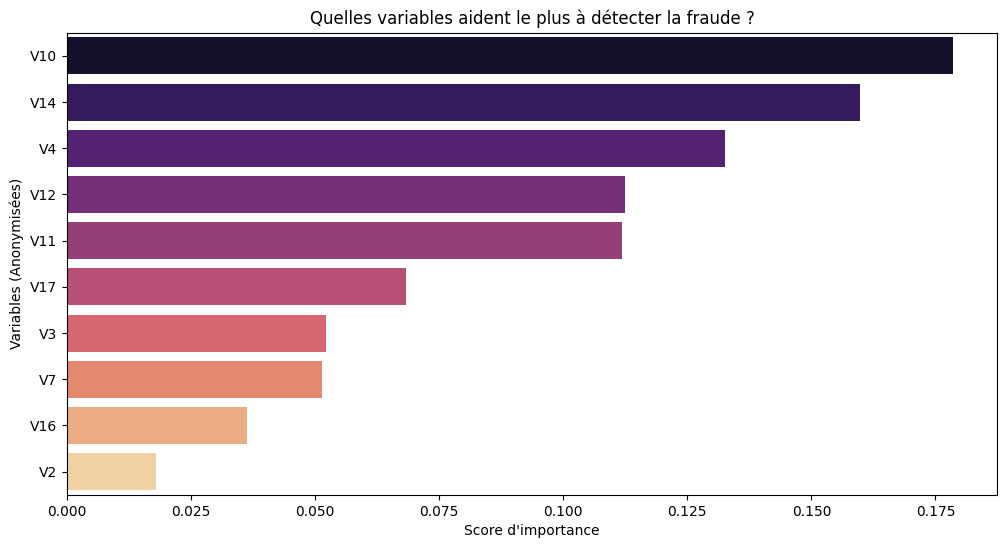

In [16]:
# @title
import numpy as np

# 1. On récupère les scores d'importance du modèle
importances = model_boosted.feature_importances_

# 2. On les trie par ordre décroissant
indices = np.argsort(importances)[::-1]

# 3. On prépare le graphique
plt.figure(figsize=(12, 6))
plt.title("Quelles variables aident le plus à détecter la fraude ?")

# On affiche les 10 variables les plus importantes
sns.barplot(x=importances[indices[:10]], y=X.columns[indices[:10]], palette='magma')

plt.xlabel("Score d'importance")
plt.ylabel("Variables (Anonymisées)")
plt.show()

# **Recommandations Business**

Le modèle avec rééquilibrage SMOTE est retenu. Bien qu'il génère plus de fausses alertes (326), il sécurise 89% du volume frauduleux.

Grâce à l'analyse de l'importance des variables, nous avons identifié que les indicateurs V17, V14 et V12 sont les signaux les plus critiques. Une surveillance accrue de ces paramètres permettrait une détection encore plus précoce.

Pour la suite, l'implémentation d'un modèle de détection d'anomalies non-supervisé pourrait aider à détecter de nouveaux types de fraudes que l'IA n'a jamais rencontrés auparavant.